## Overview

The objective of this assignment is to learn about the concept of TensorFlow and implement neural networks using it. Three different structures of neural networks are built and it is justified why and how such structures are chosen and built. The results are the later plot and visualised for further analysis.

## Data

### Desciption

The dataset is a record of all the data tracked and backlogged by the various sensors in a smartphone like acceleration, angualar velocity etc. that corresponds to the one of the possible activties that a user can do with it physically. The possible activities are classified as

1. Standing 
2. Sitting 
3. Laying 
4. Walking 
5. Walking Downstairs
6. Walking Upstairs

The data from different sensors like accelerometers, gravity sensors are collected and extrapolated over a (X,Y,Z) plane and based on these collected data, a predictive model can be built to determine the action performed. The dataset is split into train and test initially for easy plotting and understanding of the data even before importing into the Python environment.

### Preprocessing and Visualisation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# load data
train = pd.read_csv("C:/Users/My Pc/Downloads/train.csv")
test = pd.read_csv("C:/Users/My Pc/Downloads/test.csv")

In [3]:
print('Activities', train['Activity'].unique())

Activities ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [4]:
pd.crosstab(train.subject, train.Activity)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
11,57,53,47,59,46,54
14,51,54,60,59,45,54
15,72,59,53,54,42,48


In [5]:
sub15 = train.loc[train['subject']==15]

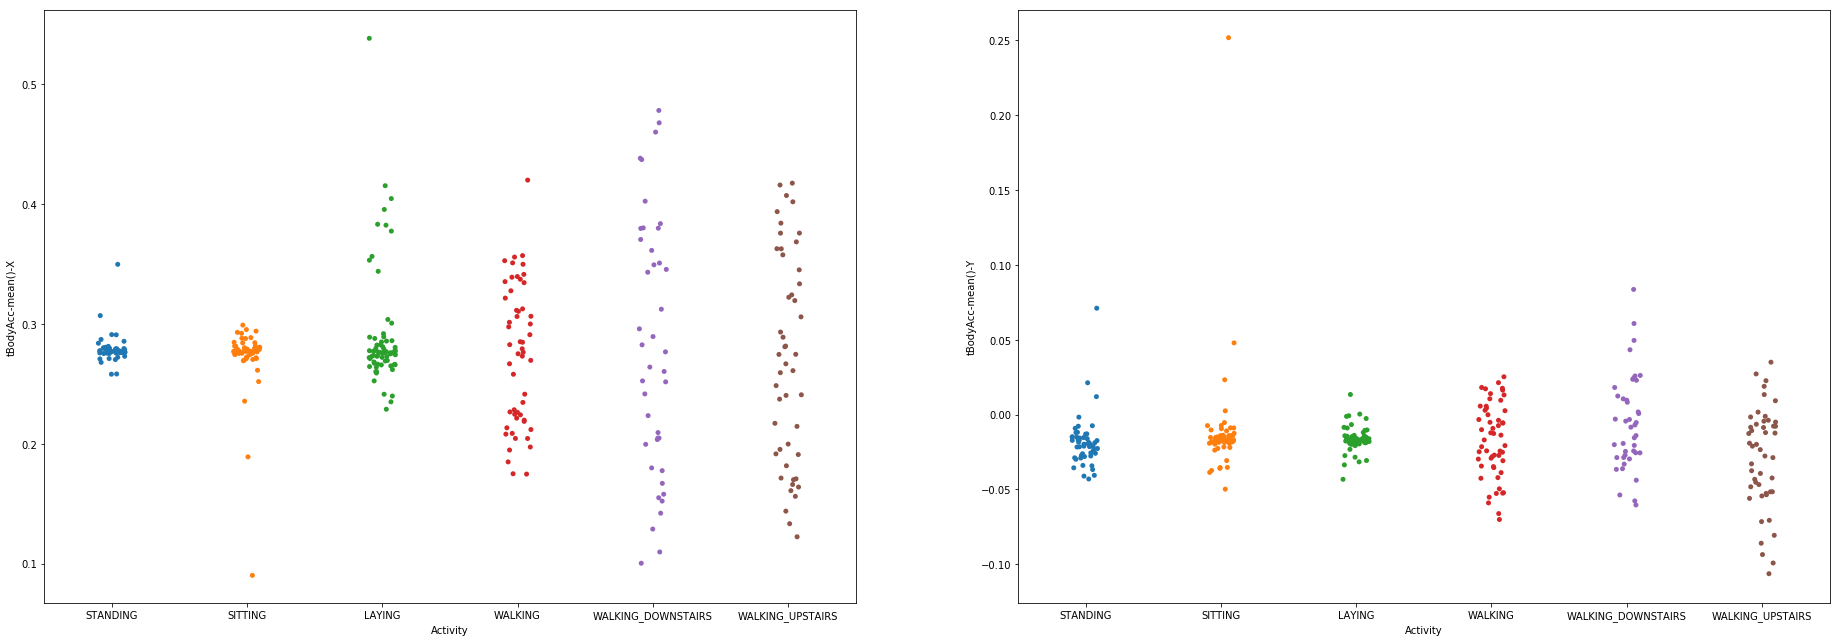

In [6]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sb.stripplot(x='Activity', y=sub15.iloc[:,0], data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sb.stripplot(x='Activity', y=sub15.iloc[:,1], data=sub15, jitter=True)
plt.show()

This plot gives the spread of data collected by the body accelerometer along the X and Y axes and how these co ordinates correspond to the different activites of a person. We can infer from the graph that the more the majority times the user moves along the X co-ordinate, he tends to end up walking upstaurs are downstairs. While on the Y co-ordinates there seems to be an even distribution.

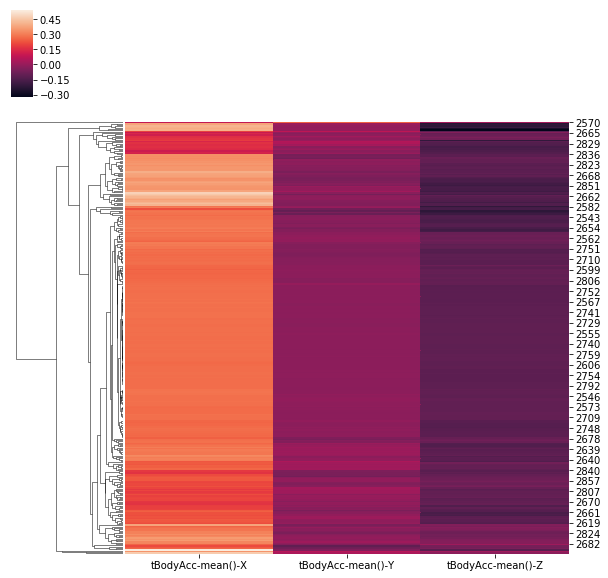

In [7]:
sb.clustermap(sub15.iloc[:,[0,1,2]], col_cluster=False)

This clustermap gives an idea of the how the accelerometer data are spread across the different axes of X, Y and Z and weighted average of them shows how densely each co-ordinate values exist and how much impact they have on determing the outcome of the user action.

In [8]:
def plotData(df):
    counters = {}
    data = df
    # split data to list
    data_list = np.array(data.loc[:])
    for data_items in data_list:
        data_item = data_items[-1] 
        if data_item in counters:
            counters[data_item] += 1
        else:
            counters[data_item] = 1
             
     
    activities = []
    label_counters = []
    for word,counter in counters.items(): 
        activities.append(word)
        label_counters.append(counter)
         
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']
    plt.pie(label_counters, labels=activities, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90) 
    plt.axis('equal')

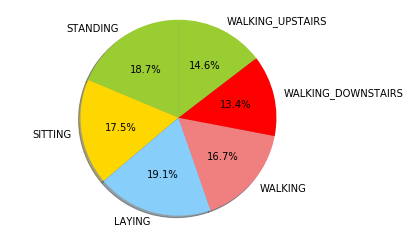

In [9]:
plotData(train)

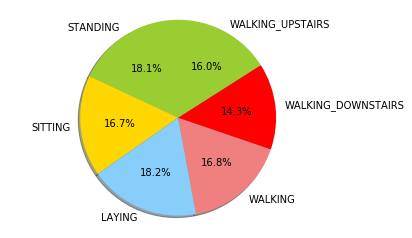

In [10]:
plotData(test)

These pie charts shows the weightage of the different activites that are spread across the training sets and the testing sets. It seems there is an equal weightage of appearance of the different categories across both the data samples. Now that we have an idea of what we have in the datasets, we go on to building the neural networks using tensorflow.

## Methods

In [11]:
import tensorflow as tf

# load train and test data
num_labels = 6
train_x = np.asarray(train.iloc[:,:-2])
train_y = np.asarray(train.iloc[:,562])
act = np.unique(train_y)
for i in np.arange(num_labels):
    np.put(train_y, np.where(train_y==act[i]), i)
train_y = np.eye(num_labels)[train_y.astype('int')] # one-hot encoding

test_x = np.asarray(test.iloc[:,:-2])
test_y = np.asarray(test.iloc[:,562])
for i in np.arange(num_labels):
    np.put(test_y, np.where(test_y==act[i]), i)
test_y = np.eye(num_labels)[test_y.astype('int')]

# shuffle the data
seed = 456
np.random.seed(seed)
np.random.shuffle(train_x)
np.random.seed(seed)
np.random.shuffle(train_y)
np.random.seed(seed)
np.random.shuffle(test_x)
np.random.seed(seed)
np.random.shuffle(test_y)

In the initial steps, we load the train and test datasets where train_x denotes the features and train_y represents the target label similarly for the test datasets, test_x and test_y represent the features and target variables respectively. The data are them shuffled just so the actions occur more randomly and completely irregular fashion. It doesn't have any impact on our neural network. It is done just to check the efficiency of the neural networks in worst case scenarios.

## Network Structure I

In [12]:
n_nodes_input = 561 # number of input features
n_nodes_hl = 15
n_nodes_h2 = 25
n_nodes_h3 = 20
n_nodes_h4 = 14
n_nodes_h5 = 11 #number of units in hidden layer
n_classes = 6      # number of activities
x = tf.placeholder('float', [None, 561])
y = tf.placeholder('float')

In [13]:
def neural_network_model(data):
    # define weights and biases for all each layer
    hidden_layer1 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_input, n_nodes_hl], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_hl]))}
    hidden_layer2 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_hl, n_nodes_h2], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_h2]))}
    hidden_layer3 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_h2, n_nodes_h3], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_h3]))}
    hidden_layer4 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_h3, n_nodes_h4], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_h4]))}
    hidden_layer5 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_h4, n_nodes_h5], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_h5]))}
    output_layer = {'weights':tf.Variable(tf.truncated_normal([n_nodes_h5, n_classes], stddev=0.3)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[n_classes]))}
    # feed forward and activations
    l1 = tf.add(tf.matmul(data, hidden_layer1['weights']), hidden_layer1['biases'])
    l1 = tf.nn.sigmoid(l1)
    l2 = tf.add(tf.matmul(l1, hidden_layer2['weights']), hidden_layer2['biases'])
    l2 = tf.nn.sigmoid(l2)
    l3 = tf.add(tf.matmul(l2, hidden_layer3['weights']), hidden_layer3['biases'])
    l3 = tf.nn.sigmoid(l3)
    l4 = tf.add(tf.matmul(l3, hidden_layer4['weights']), hidden_layer4['biases'])
    l4 = tf.nn.sigmoid(l4)
    l5 = tf.add(tf.matmul(l4, hidden_layer5['weights']), hidden_layer5['biases'])
    l5 = tf.nn.sigmoid(l5)
    output = tf.matmul(l5, output_layer['weights']) + output_layer['biases']
    
    return output

In [14]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=prediction))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    for epoch in range(1000):
        loss = 0
        _, c = sess.run([optimizer, cost], feed_dict = {x: train_x, y: train_y})
        loss += c
        if (epoch % 100 == 0 and epoch != 0):
            print(int(epoch/100), 'Train MSE:', loss)
    correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='op_accuracy')
    
    print('Train set Accuracy:', sess.run(accuracy, feed_dict = {x: train_x, y: train_y}))
    print('Test set Accuracy:', sess.run(accuracy, feed_dict = {x: test_x, y: test_y}))

In [15]:
train_neural_network(x)

1 Train MSE: 0.506710350513
2 Train MSE: 0.459596186876
3 Train MSE: 0.451007038355
4 Train MSE: 0.448253571987
5 Train MSE: 0.441532611847
6 Train MSE: 0.416494071484
7 Train MSE: 0.388762384653
8 Train MSE: 0.368428379297
9 Train MSE: 0.354779541492
Train set Accuracy: 0.398803
Test set Accuracy: 0.388191


### Choice of Selection and Code Explanation

The neural network is built with five hidden layers. Then the neural network model is built by assigning weights and biases to all the five layers and the output layers. Initially for the first structure, we provide 15,25,20,14,11 as the neuron counts to each of the layers. Adam Optimizer is used to reduce the noise and error thereby giving a streamlined and optimized output.

Initially, the neural networs learn from the training data and when they have built a strong dictionary they predict the outcomes on the test data based on what they have learnt in the training data. Here, we can see that both training accuracy and test accuracy are at a very low rate of 39%. So, this structure is not advisable for learning. 

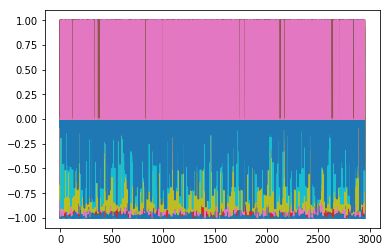

In [18]:
plt.plot(test_x)
plt.plot(test_y)

The plot shows the predicted actions by the neural networks. The distribution hows how the various categories are spread across the different categories.

As mentioned earlier this is not the best model or neural structure as it is messy.

## Network Structure II

In [19]:
n_nodes_input = 561 # number of input features
n_nodes_hl = 35
n_nodes_h2 = 20
n_nodes_h3 = 15
n_nodes_h4 = 25
n_nodes_h5 = 18 #number of units in hidden layer
n_classes = 6      # number of activities
x = tf.placeholder('float', [None, 561])
y = tf.placeholder('float')

In [20]:
def neural_network_model(data):
    # define weights and biases for all each layer
    hidden_layer1 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_input, n_nodes_hl], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_hl]))}
    hidden_layer2 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_hl, n_nodes_h2], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_h2]))}
    hidden_layer3 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_h2, n_nodes_h3], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_h3]))}
    hidden_layer4 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_h3, n_nodes_h4], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_h4]))}
    hidden_layer5 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_h4, n_nodes_h5], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_h5]))}
    output_layer = {'weights':tf.Variable(tf.truncated_normal([n_nodes_h5, n_classes], stddev=0.3)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[n_classes]))}
    # feed forward and activations
    l1 = tf.add(tf.matmul(data, hidden_layer1['weights']), hidden_layer1['biases'])
    l1 = tf.nn.sigmoid(l1)
    l2 = tf.add(tf.matmul(l1, hidden_layer2['weights']), hidden_layer2['biases'])
    l2 = tf.nn.sigmoid(l2)
    l3 = tf.add(tf.matmul(l2, hidden_layer3['weights']), hidden_layer3['biases'])
    l3 = tf.nn.sigmoid(l3)
    l4 = tf.add(tf.matmul(l3, hidden_layer4['weights']), hidden_layer4['biases'])
    l4 = tf.nn.sigmoid(l4)
    l5 = tf.add(tf.matmul(l4, hidden_layer5['weights']), hidden_layer5['biases'])
    l5 = tf.nn.sigmoid(l5)
    output = tf.matmul(l5, output_layer['weights']) + output_layer['biases']
    
    return output

In [21]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=prediction))
    optimizer = tf.train.GradientDescentOptimizer(0.25).minimize(cost)
    
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    for epoch in range(1000):
        loss = 0
        _, c = sess.run([optimizer, cost], feed_dict = {x: train_x, y: train_y})
        loss += c
        if (epoch % 100 == 0 and epoch != 0):
            print(int(epoch/100), 'Train MSE:', loss)
    correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='op_accuracy')
    
    print('Train set Accuracy:', sess.run(accuracy, feed_dict = {x: train_x, y: train_y}))
    print('Test set Accuracy:', sess.run(accuracy, feed_dict = {x: test_x, y: test_y}))

In [22]:
train_neural_network(x)

1 Train MSE: 0.4490698874
2 Train MSE: 0.449010640383
3 Train MSE: 0.448983550072
4 Train MSE: 0.448956906796
5 Train MSE: 0.448930114508
6 Train MSE: 0.448903143406
7 Train MSE: 0.448875069618
8 Train MSE: 0.448846369982
9 Train MSE: 0.448816418648
Train set Accuracy: 0.191376
Test set Accuracy: 0.182219


### Choice of Selection and Code Explanation

The neural network is built in just as a similar way as the structure I with five hidden layers. The strucutral difference is achieved by increasing the number of neurons in each of the hidden layers. The neuron counts are given as 35,20,15,25,18. Instead of Adam Optimizer, we try out with Gradient Descent Optimizer with a learning rate of 0.25.

Upon running the session, we can see that both training accuracy and test accuracy are much lower than befire at a meagre level of 19%. So, this structure can also be discarded. 

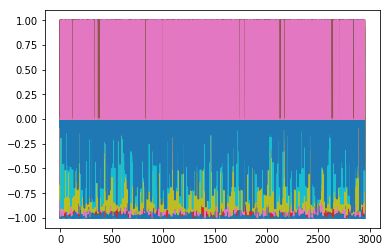

In [23]:
plt.plot(test_x)
plt.plot(test_y)

The plot shows the predicted actions by the neural networks. The distribution hows how the various categories are spread across the different categories.

Just as before this is not the best model or neural structure as it is messy and the model is prone to high occurence of error.

## Network Structure III

In [24]:
n_nodes_input = 561 # number of input features
n_nodes_hl = 50
n_nodes_h2 = 55
n_nodes_h3 = 60
n_nodes_h4 = 65
n_nodes_h5 = 44 #number of units in hidden layer
n_classes = 6      # number of activities
x = tf.placeholder('float', [None, 561])
y = tf.placeholder('float')

In [25]:
def neural_network_model(data):
    # define weights and biases for all each layer
    hidden_layer1 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_input, n_nodes_hl], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_hl]))}
    hidden_layer2 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_hl, n_nodes_h2], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_h2]))}
    hidden_layer3 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_h2, n_nodes_h3], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_h3]))}
    hidden_layer4 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_h3, n_nodes_h4], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_h4]))}
    hidden_layer5 = {'weights':tf.Variable(tf.truncated_normal([n_nodes_h4, n_nodes_h5], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_h5]))}
    output_layer = {'weights':tf.Variable(tf.truncated_normal([n_nodes_h5, n_classes], stddev=0.3)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[n_classes]))}
    # feed forward and activations
    l1 = tf.add(tf.matmul(data, hidden_layer1['weights']), hidden_layer1['biases'])
    l1 = tf.nn.sigmoid(l1)
    l2 = tf.add(tf.matmul(l1, hidden_layer2['weights']), hidden_layer2['biases'])
    l2 = tf.nn.sigmoid(l2)
    l3 = tf.add(tf.matmul(l2, hidden_layer3['weights']), hidden_layer3['biases'])
    l3 = tf.nn.sigmoid(l3)
    l4 = tf.add(tf.matmul(l3, hidden_layer4['weights']), hidden_layer4['biases'])
    l4 = tf.nn.sigmoid(l4)
    l5 = tf.add(tf.matmul(l4, hidden_layer5['weights']), hidden_layer5['biases'])
    l5 = tf.nn.sigmoid(l5)
    output = tf.matmul(l5, output_layer['weights']) + output_layer['biases']
    
    return output

In [26]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=prediction))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    for epoch in range(1000):
        loss = 0
        _, c = sess.run([optimizer, cost], feed_dict = {x: train_x, y: train_y})
        loss += c
        if (epoch % 100 == 0 and epoch != 0):
            print(int(epoch/100), 'Train MSE:', loss)
    correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='op_accuracy')
    
    print('Train set Accuracy:', sess.run(accuracy, feed_dict = {x: train_x, y: train_y}))
    print('Test set Accuracy:', sess.run(accuracy, feed_dict = {x: test_x, y: test_y}))

In [27]:
train_neural_network(x)

1 Train MSE: 0.412909626961
2 Train MSE: 0.314274251461
3 Train MSE: 0.192080065608
4 Train MSE: 0.121314682066
5 Train MSE: 0.0708715692163
6 Train MSE: 0.0448842868209
7 Train MSE: 0.0309539586306
8 Train MSE: 0.0227349232882
9 Train MSE: 0.0179285202175
Train set Accuracy: 0.999592
Test set Accuracy: 0.958941


### Choice of Selection and Code Explanation

Finally, we try out another neura network structure by modifying the neurons count in each layer. In this structure, The neuron counts are given as 50,55,60,65,44. We found that Gradient Descent Optimizer doesn't create good results for this model, so we can revert back to Adam Optimizer.

Upon running the session, we get a very good training and testing score. The training accuracy is 99% while the test accuracy is 95%. So, this is deemed the best fit neural network structure for prediction. 

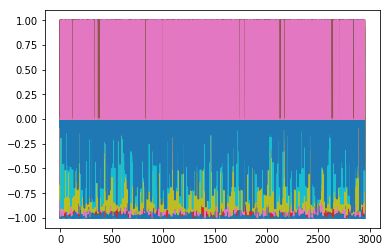

In [28]:
plt.plot(test_x)
plt.plot(test_y)

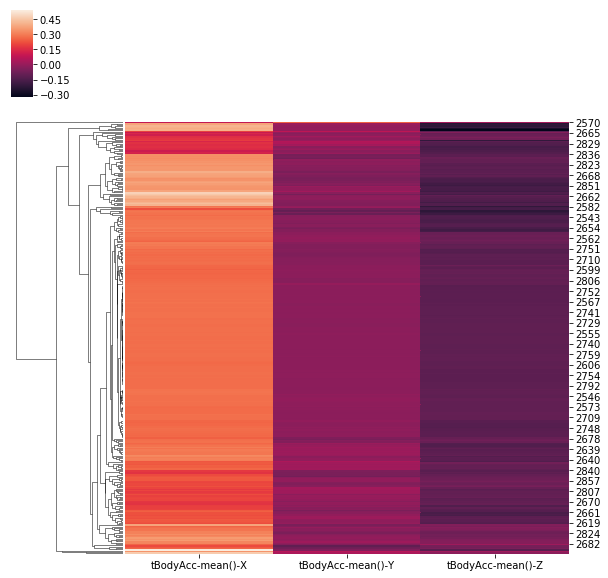

In [30]:
sb.clustermap(sub15.iloc[:,[0,1,2]], col_cluster=False)

The clustermap show the predicted spread along the X,Y,Z co ordinates.

The plot affirms our inference that this final nueral structure is the best for analysis.

# Conclusion

Through this assignment, a clear idea of neural networks and how different structures can be built with tensorflow is learnt.I have also infered that the bigger the data are, more neurons are required to attain maximum accuracy. The challenges faced was where the dimensionality errors while building the model. But with a lot of trial and error, I have learnt to build, evaluate and test the different neural network structures.